# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests as r 
import json

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


In [4]:
response = r.get(url)
print(response)

<Response [200]>


In [5]:
with open('images.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
images = pd.read_csv('images.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
tweets = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)
        
additional_data = pd.DataFrame(tweets, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data




In [8]:
twitter_archive.head(15)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive[twitter_archive['rating_numerator']==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
twitter_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [14]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
twitter_archive[['doggo', 'puppo', 'pupper', 'floofer']].sample(12)

,doggo,puppo,pupper,floofer
1738,None,None,pupper,None
2208,None,None,None,None
465,None,None,pupper,None
337,None,None,None,None
1088,None,None,None,None
1857,None,None,None,None
109,None,None,None,None
701,None,puppo,None,None
1655,None,None,None,None
1855,None,None,None,None


In [17]:
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
additional_data.sample(10)

,id,retweet_count,favorite_count
55,881536004380872706,16570,50199
1207,715696743237730304,1454,4257
746,779834332596887552,8237,21252
1316,706538006853918722,1580,3778
2342,666071193221509120,67,154
1791,677331501395156992,265,1189
308,835536468978302976,1939,0
776,776088319444877312,179,2045
1611,685315239903100929,1234,3676
1895,674737130913071104,103,693


In [19]:
additional_data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
Length: 2354, dtype: bool

In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
images.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,690932576555528194,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,polecat,0.185382,False,mink,0.105282,False,Newfoundland,0.086241,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
66,667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
1397,768193404517830656,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
202,669683899023405056,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True


## Quality Issues

1. Chaning all 'None' values to 'NaN'
(Twitter Archive Dataset)

2. Timestamp has a data type object instead of a datetime format
(Twitter Archive Dataset)

3. Dropping columns with a lot of null values; retweeted_status_id, retweeted_status-user-id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id
(Twitter Archive Dataset)

4. Removing ratings that are not for dogs; ratings, text 
(Twitter Archive Dataset)

5. Removing ratings with huge numerators and denominators 
(Twitter Archive Dataset)

6. Deleting anchor tags and extracting the source  
(Twitter Archive Dataset)

7. Dropping columns that are not important 
(Twitter Archive Dataset)

8. Most of the animals with 'false' in the p2_dog column were not dogs 
(Images Dataset)

## Tidiness Issues
1. Three datasets are a lot, they need to be merged (Twitter Archive, Images and Additional Data Datasets)

2. Same variable in four columns (Twitter Archive Dataset; doggo, puppo, pupper and floofer columns)

## Cleaning Data


### Issue #1: DATA QUALITY

In [22]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
additional_data_clean = additional_data.copy()

### CHANGING ALL 'NONE' VALUES TO 'NAN'

#### Define

Chaning the values using .replace

#### Code

In [23]:
#List the columns that contain 'none'
None_variable = ['doggo', 'pupper', 'puppo', 'floofer']

#Change the values
twitter_archive_clean[None_variable] = twitter_archive_clean[None_variable].replace('None', np.nan)

#### Test

In [24]:
twitter_archive_clean[['doggo', 'puppo', 'pupper', 'floofer']].sample(12)

,doggo,puppo,pupper,floofer
996,NaN,NaN,pupper,NaN
151,NaN,NaN,NaN,NaN
1428,NaN,NaN,pupper,NaN
2204,NaN,NaN,NaN,NaN
1211,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN
1980,NaN,NaN,pupper,NaN
1306,NaN,NaN,NaN,NaN
1713,NaN,NaN,pupper,NaN
1359,NaN,NaN,NaN,NaN


## TIMESTAMP HAS A DATA TYPE OBJECT INSTEAD OF A DATETIME FORMAT

#### Define
Convert timestamp datatype from object to datetime using .to_datetime()

#### Code

In [25]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [26]:
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), floa

 ## DROPPING COLUMNS WITH NULL VALUES

#### Define
Dropping columns with a function by first dropping non-null rows

#### Code

In [28]:
#defining functions 
def drop_columns_rows(dataframe, values, axis=0):


    dataframe.drop(values, axis=axis, inplace=True)

In [29]:
# getting index of non-null values in all retweet columns
retweets = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()].index


In [30]:
#dropping non-null rows 
drop_columns_rows(twitter_archive_clean, retweets)

In [31]:
# Checking if non-null retweet rows have been dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64(4)

In [32]:
null = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']

#function to drop coulmns 
drop_columns_rows(twitter_archive_clean, null, axis=1)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


## REMOVING RATINGS THAT ARE NOT DOG RELATED

#### Define
Dropping columns that are not dog related

#### Code

In [36]:
#Assign variable
other_animals = twitter_archive_clean[twitter_archive_clean['text'].str.match('.*only rate dog')].index

#droping
drop_columns_rows(twitter_archive_clean, other_animals)

#### Test

In [37]:
# This should produce an empty list
other_animals

Int64Index([], dtype='int64')

## REMOVING RATINGS WITH HUGE NUMERATORS AND DENOMINATORS

#### Define
Droping numerator ratings with more than or equal to 50 and denominator ratings with anything other figure aside 10

#### Code

In [42]:
# Assinging a variable 
numerator = twitter_archive_clean[twitter_archive_clean['rating_numerator']>=50].index

In [43]:
#function to drop coulmns 
drop_columns_rows(twitter_archive_clean, numerator)

#### Test

In [44]:
numerator

Int64Index([], dtype='int64')

#### Code

In [50]:
#Assinging a variable
denominator = twitter_archive_clean[twitter_archive_clean['rating_denominator']!=10].index


In [51]:
#function to drop columns
drop_columns_rows(twitter_archive_clean, denominator)

#### Test

In [52]:
# This should produce an empty list
denominator

Int64Index([], dtype='int64')

In [53]:
twitter_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.092000e+03,2092.000000,2092.0
mean,7.364111e+17,10.639579,10.0
std,6.740101e+16,2.262776,0.0
min,6.660209e+17,0.000000,10.0
25%,6.764899e+17,10.000000,10.0
50%,7.088226e+17,11.000000,10.0
75%,7.885006e+17,12.000000,10.0
max,8.924206e+17,27.000000,10.0


## DELETING ANCHOR TAGS AND EXTRACTING THE SOURCE

#### DEFINE
Extracting the exact sources

## Code

In [54]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [55]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1961
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                 9
Name: source, dtype: int64

## DROPPING COLUMNS THAT ARE NOT IMPORTANT

#### Define
Dropping columns with the drop function 

#### Code

In [56]:
not_needed = ['text', 'expanded_urls']
drop_columns_rows(twitter_archive_clean, not_needed, axis = 1)

#### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 179.8+ KB







## Issue #2: Tidiness

#### Define
Combining four columns with the same variables (doggo, pupper, puppo, floofer)

#### Code

In [58]:
#Assinging columns to a variable
four_columns = ['doggo', 'pupper', 'puppo', 'floofer']

def join(breed):
    return ', '.join(breed.dropna().astype(str))

twitter_archive_clean['four_columns'] = twitter_archive_clean[four_columns].apply(join, axis=1)

twitter_archive_clean['four_columns'] = twitter_archive_clean['four_columns'].replace('',np.nan)

In [59]:
drop_columns_rows(twitter_archive_clean, four_columns, axis=1)

#### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
four_columns          344 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 130.8+ KB


In [61]:
twitter_archive_clean.four_columns.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: four_columns, dtype: int64

#### Define 
Merging the three datasets

#### Code

In [62]:
merged = pd.merge(twitter_archive_clean, images_clean, on='tweet_id',  how='left' )

df = pd.merge(merged, additional_data_clean, left_on='tweet_id',right_on='id',how='left' )

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 21 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
four_columns          344 non-null object
jpg_url               1918 non-null object
img_num               1918 non-null float64
p1                    1918 non-null object
p1_conf               1918 non-null float64
p1_dog                1918 non-null object
p2                    1918 non-null object
p2_conf               1918 non-null float64
p2_dog                1918 non-null object
p3                    1918 non-null object
p3_conf               1918 non-null float64
p3_dog                1918 non-null object
id                    2092 non-null int64
retweet_count         2092 non-null int64
favorite_count        2092 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Insights:

1. The source of most tweets and ratings were from iphones

2. Relationship between favorite count and retweet counts. Favorite count and retweet count have a positive correlation. It can be concluded that, tweets with most likes are likely to be retweeted more.

3. The most common dog rating is 12/10

### Visualization

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 21 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null datetime64[ns]
source                2092 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
four_columns          344 non-null object
jpg_url               1918 non-null object
img_num               1918 non-null float64
p1                    1918 non-null object
p1_conf               1918 non-null float64
p1_dog                1918 non-null object
p2                    1918 non-null object
p2_conf               1918 non-null float64
p2_dog                1918 non-null object
p3                    1918 non-null object
p3_conf               1918 non-null float64
p3_dog                1918 non-null object
id                    2092 non-null int64
retweet_count         2092 non-null int64
favorite_count        2092 

### Source of tweets and ratings

In [66]:
rating_source = df.source.value_counts()

In [67]:
rating_source

Twitter for iPhone     1961
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                 9
Name: source, dtype: int64

### Relationship between favorite count and retweet count

In [68]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,id,retweet_count,favorite_count
count,2.092000e+03,2092.000000,2092.0,1918.000000,1918.000000,1.918000e+03,1.918000e+03,2.092000e+03,2092.000000,2092.000000
mean,7.364111e+17,10.639579,10.0,1.205422,0.593179,1.349144e-01,6.042929e-02,7.364111e+17,2707.719407,8590.744264
std,6.740101e+16,2.262776,0.0,0.565512,0.272909,1.010738e-01,5.104888e-02,6.740101e+16,4623.063297,11938.436606
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,0.000000,52.000000
25%,6.764899e+17,10.000000,10.0,1.000000,0.360093,5.407533e-02,1.605313e-02,6.764899e+17,597.750000,1852.750000
50%,7.088226e+17,11.000000,10.0,1.000000,0.587440,1.181350e-01,4.947920e-02,7.088226e+17,1320.000000,3954.000000
75%,7.885006e+17,12.000000,10.0,1.000000,0.848095,1.963873e-01,9.241083e-02,7.885006e+17,3130.250000,10971.000000
max,8.924206e+17,27.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,8.924206e+17,79515.000000,132810.000000


In [69]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

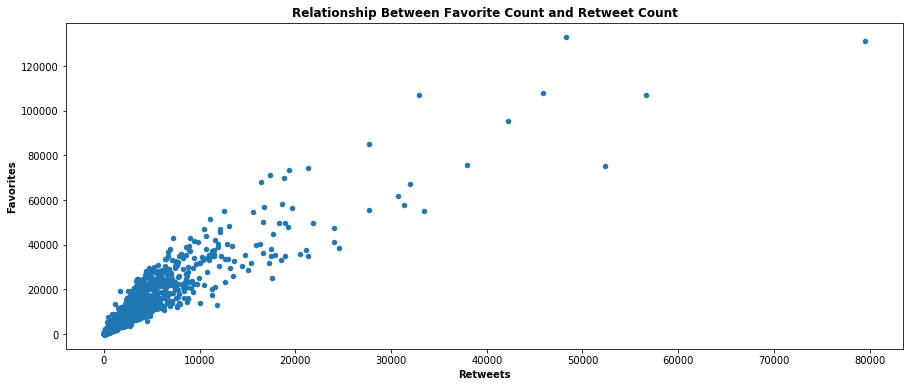

In [70]:
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

df.plot('retweet_count', 'favorite_count',kind='scatter',figsize=(15,6))
plt.title('Relationship Between Favorite Count and Retweet Count', weight='bold')
plt.xlabel('Retweets', weight='bold')
plt.ylabel('Favorites', weight='bold');



 Tweets with the most likes are likely to be retweeted more

In [72]:
df.rating_numerator.value_counts()

12    487
10    430
11    412
13    304
9     146
8      96
7      52
14     42
5      36
6      32
3      18
4      15
2       9
1       7
0       2
26      1
17      1
15      1
27      1
Name: rating_numerator, dtype: int64